# DAT 19: Homework 3 Assignment - Clustering with K-means

## Instructions

In this homework assignment, we will get practice with our first unsupervised learning technique, clustering. We will analyze wholesale purchases by 440 clients of a wholesale distributor. 

Please do all your analysis to answer the questions below in this Jupyter notebook. Show your work.

**Please submit your completed notebook by 6:30PM on Wednesday, January 20.**

## About the Data

The [Wholesale Customers dataset](http://archive.ics.uci.edu/ml/datasets/Wholesale+customers) and a description of the data is available from the UCI ML Repository.

## Homework Assignment

**1) Load the dataset. Check for missing values, perform any normalization that you think is necessary (remember that K-means uses the Euclidean Distance function).**

In [5]:
import pandas as pd

Wholesale_Dat = pd.read_csv('UCI_Wholesale_Data.csv')
WS_DF = pd.DataFrame(Wholesale_Dat)
WS_DF.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
WS_DF.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


**2.1) Look at the dataset. There are both continuous and categorical variables. What are the categorical variables? From a business perspective, what do those categorical variables represent?**

Channel and Region are categorical variables, and Fresh, Milk, Grocery, Frozen, Detergents_Paper and Delicassen are continuous variables indicating annual spend amount on those products. From a business perspective, the categorical variables represent the geographic region where purchases were made and through which marketing/sales channel. 

http://archive.ics.uci.edu/ml/datasets/Wholesale+customers#

1)	FRESH: annual spending (m.u.) on fresh products (Continuous); 
2)	MILK: annual spending (m.u.) on milk products (Continuous); 
3)	GROCERY: annual spending (m.u.)on grocery products (Continuous); 
4)	FROZEN: annual spending (m.u.)on frozen products (Continuous) 
5)	DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
6)	DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); 
7)	CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal) 
8)	REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal) 
Descriptive Statistics: 

(Minimum, Maximum, Mean, Std. Deviation) 
FRESH (	3, 112151, 12000.30, 12647.329) 
MILK	(55, 73498, 5796.27, 7380.377) 
GROCERY	(3, 92780, 7951.28, 9503.163) 
FROZEN	(25, 60869, 3071.93, 4854.673) 
DETERGENTS_PAPER (3, 40827, 2881.49, 4767.854) 
DELICATESSEN (3, 47943, 1524.87, 2820.106) 

REGION	Frequency 
Lisbon	77 
Oporto	47 
Other Region	316 
Total	440 

CHANNEL	Frequency 
Horeca	298 
Retail	142 
Total	440 

**2.2) What results might we expect from the k-means clustering if we were to run it on the dataset as-is? Explain your thinking in words.**

Since the different features have different variances amongst their values, the kmeans distances won't be calculated correctly unless the data is normalized or standardized so that the values are comparable across features.  However, even with normalization or standardization, around .6 seems to be the maximum silhouette score possible. 

**3) Using ONLY the continuous features in the dataset, apply the K-means algorithm to find clusters in the data.**

In [106]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

X = np.array(WS_DF[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])

scaler = preprocessing.StandardScaler().fit(X)
X_Stan = scaler.transform(X)

km = KMeans(2)
km.fit(X_Stan)

labels = km.labels_
centroids = km.cluster_centers_

/Users/andrewpederson/anaconda/envs/GenAssembly/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/andrewpederson/anaconda/envs/GenAssembly/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


**4.1) Plot the Silhouette Coefficient as a function of the number of clusters (remember that you set the number of clusters as an input to K-means).**

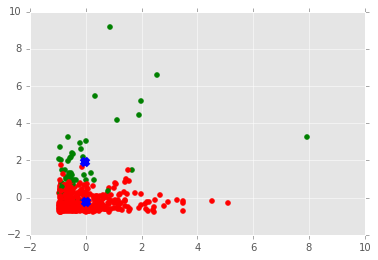

[[-0.0223623   1.90875103  2.0696465   0.27092606  1.95694778  0.78092337]
 [ 0.00280244 -0.23920409 -0.25936746 -0.03395237 -0.24524409 -0.09786508]]


In [107]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
%matplotlib inline

colors = ["g.", "r."]
for i in range(len(X_Stan)):
    plt.plot(X_Stan[i][0], X_Stan[i][1], colors[labels[i]], markersize = 10)
    
plt.scatter(centroids[:, 0], centroids[:, 1], marker = "x", s=50, linewidths = 5, zorder = 10)

plt.show()

print centroids

**4.2) What is the ideal value for k, the number of clusters? Why?**

k=2 produces the clusters with the highest silhouette score, meaning that the groups are well-defined, and the distance between points is, on average, large enough to clearly distinguish as one of the two classes. 

('For n_clusters =', 2, 'The average silhouette_score is :', 0.59090419862854526)


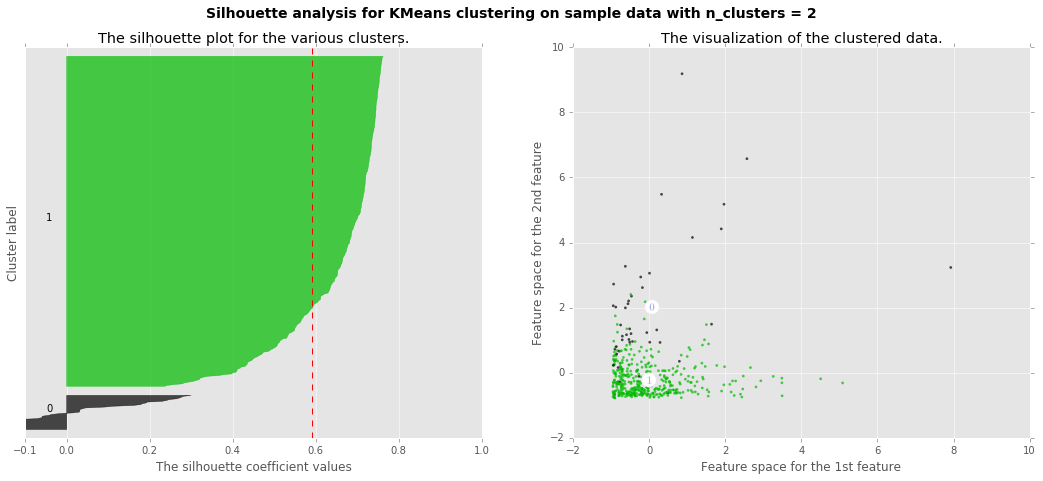

('For n_clusters =', 3, 'The average silhouette_score is :', 0.54828726497006008)


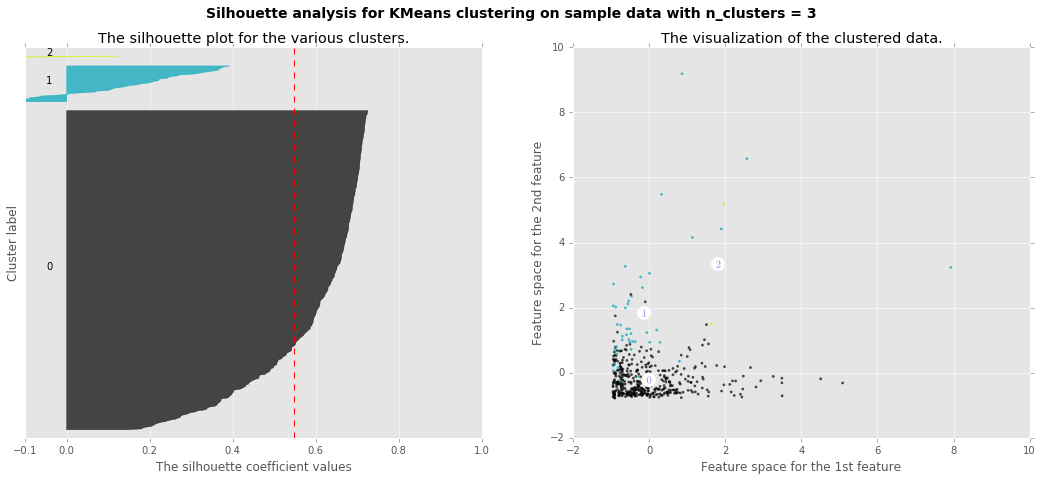

('For n_clusters =', 4, 'The average silhouette_score is :', 0.34573629344658091)


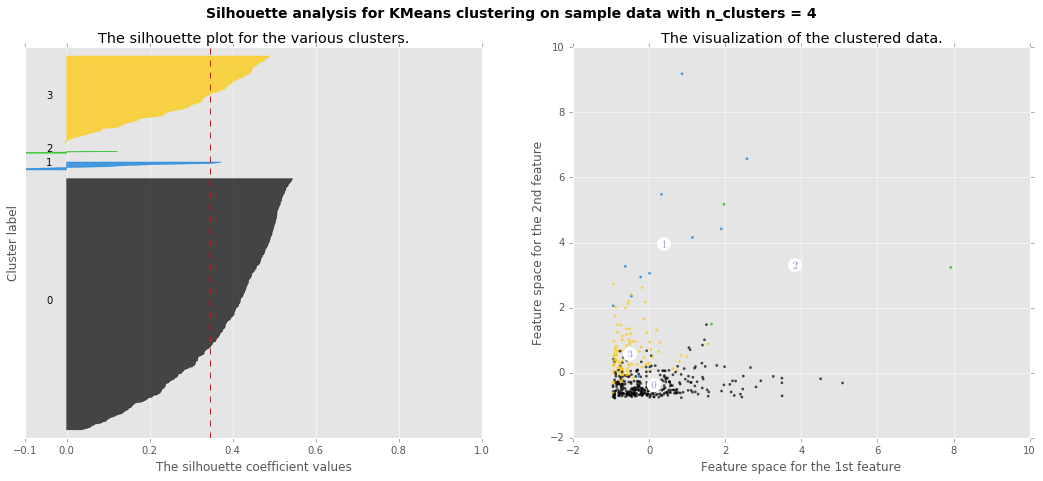

('For n_clusters =', 5, 'The average silhouette_score is :', 0.37131310995400818)


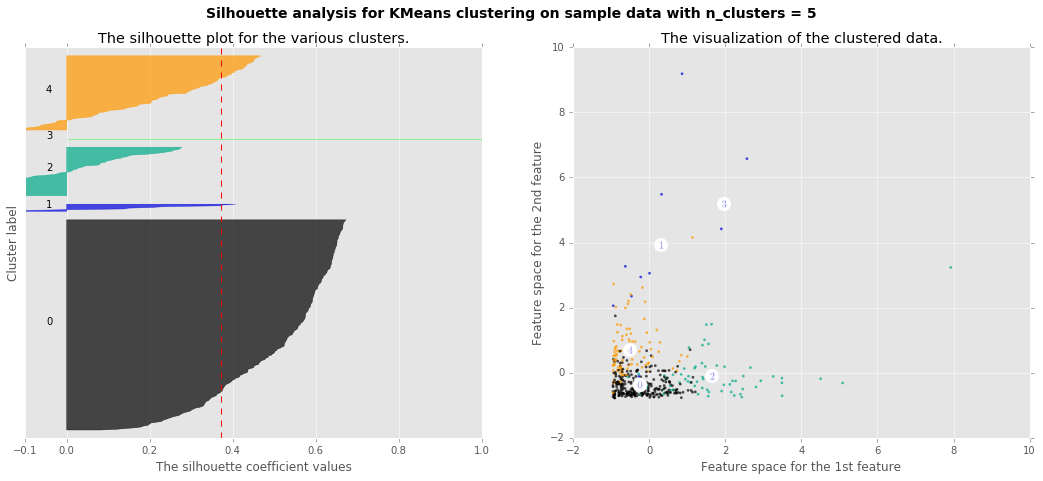

('For n_clusters =', 6, 'The average silhouette_score is :', 0.37659676713557416)


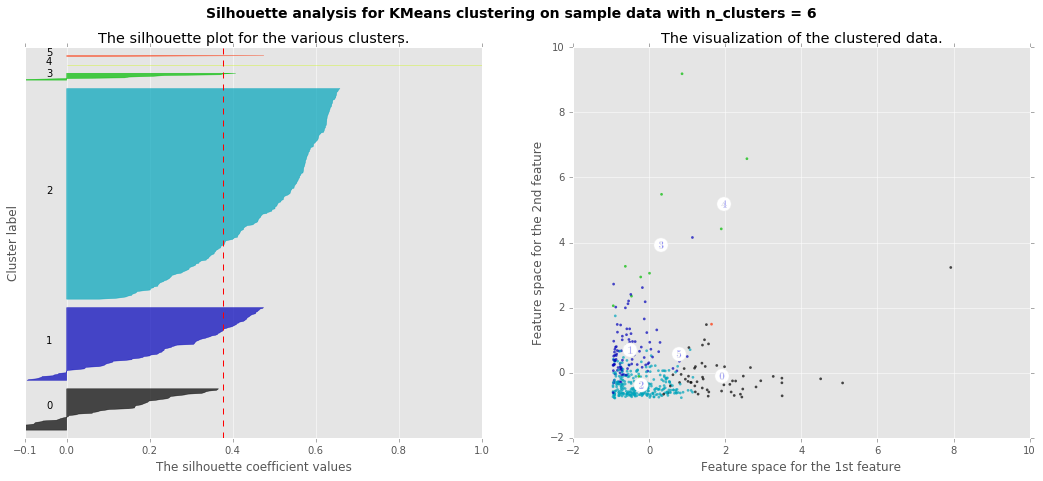

In [100]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_Stan)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_Stan, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_Stan, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_Stan[:, 0], X_Stan[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

**4.3) How does your answer for 3.2 compare with your thoughts from 2.2 above?**

Standardizing the data did increase the sihouette score; however, the clusters generated don't look convincing, except perhaps to point out that there are two main groups of consumers, one who spends more money on food, and the other less.  It is also possible that these clusters are assoicated with different retail channels if wealthier consumers consistently tend to buy at one location, and less wealthy consumers at another. 

### Extra Credit Questions
**The following questions are strongly encouraged, but not required for this homework assignment.**

**5) Read the scikit-learn user guide section about [clustering](http://scikit-learn.org/stable/modules/clustering.html). Pay particular attention to the section about [assumptions](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#example-cluster-plot-kmeans-assumptions-py).**

**6) PCA & PLOTTING:** <br> With six continuous features, plotting our clusters in two dimensions will be challenging. We can use [Principal Components Analysis](http://scikit-learn.org/stable/modules/decomposition.html#pca) and then plot only the "top two" dimensions. More technically, these are the dimensions that capture most of the variance in our data set. For this extra credit question, read about [PCA in the sklearn.decomposition module](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), apply it to the wholesale dataset, repeat the k-means clustering, and plot your results using only the top two principal components.

In [113]:
from sklearn.decomposition import PCA

PCA_Dat = PCA(n_components=2)
PCA_Dat.fit(X)
X_PCA = PCA_Dat.transform(X)

In [114]:
km_pca = KMeans(2)
km_pca.fit(X_PCA)
pca_labels = km_pca.labels_
pca_centroids = km_pca.cluster_centers_

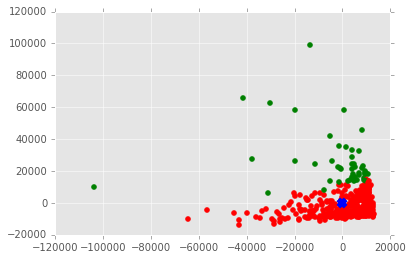

[[-0.0223623   1.90875103  2.0696465   0.27092606  1.95694778  0.78092337]
 [ 0.00280244 -0.23920409 -0.25936746 -0.03395237 -0.24524409 -0.09786508]]


In [115]:
%matplotlib inline

colors = ["g.", "r."]
for i in range(len(X_PCA)):
    plt.plot(X_PCA[i][0], X_PCA[i][1], colors[labels[i]], markersize = 10)
    
plt.scatter(centroids[:, 0], centroids[:, 1], marker = "x", s=50, linewidths = 5, zorder = 10)

plt.show()

print centroids

('For n_clusters =', 2, 'The average silhouette_score is :', 0.5426062928574954)


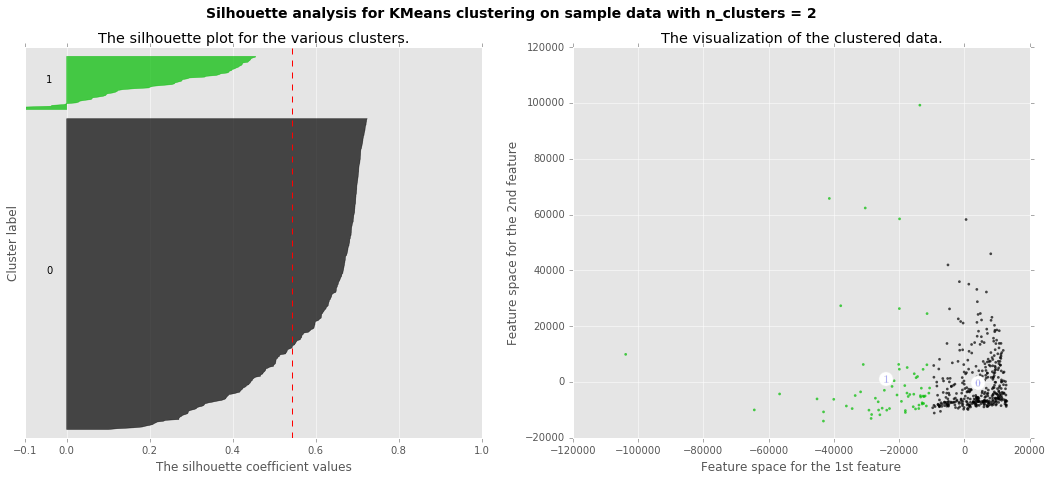

('For n_clusters =', 4, 'The average silhouette_score is :', 0.46235710278169817)


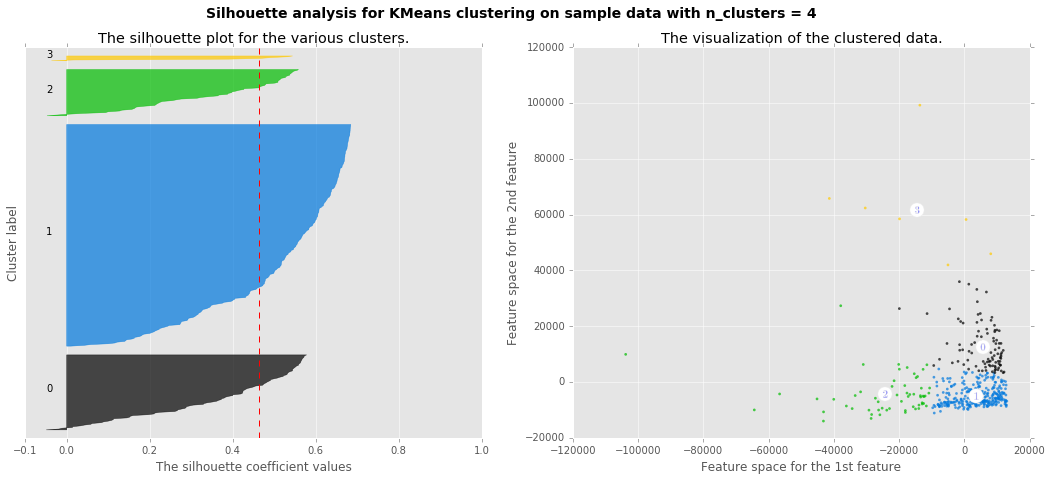

('For n_clusters =', 6, 'The average silhouette_score is :', 0.43156890538615506)


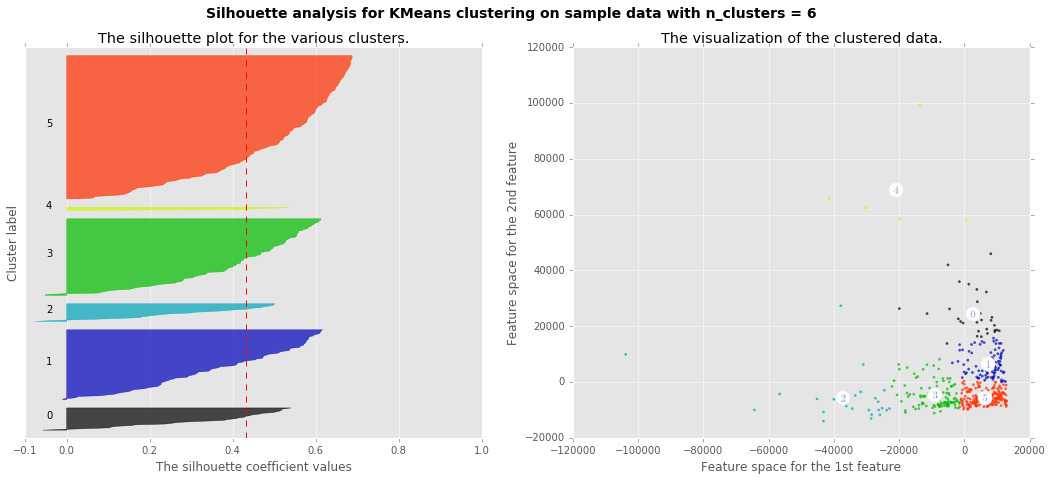

('For n_clusters =', 8, 'The average silhouette_score is :', 0.41082645832635967)


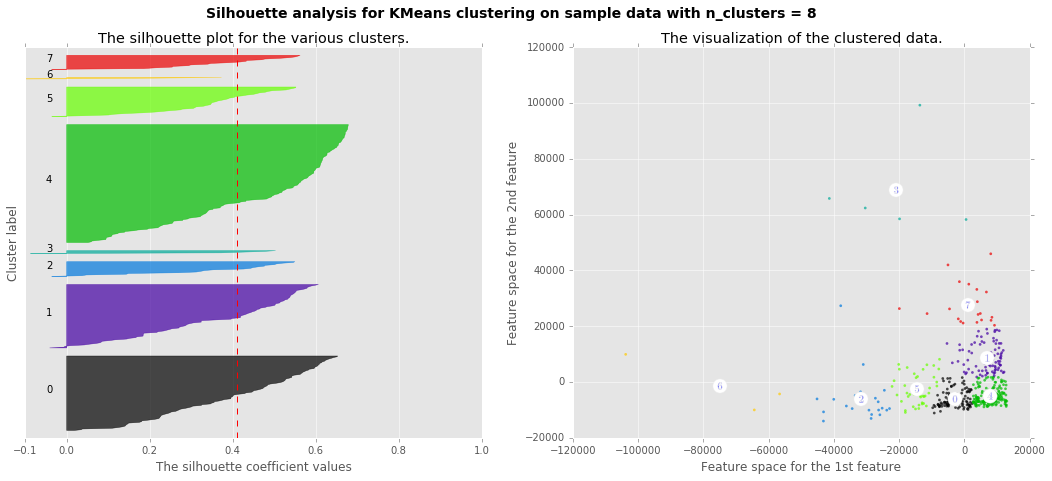

('For n_clusters =', 10, 'The average silhouette_score is :', 0.38511328163771896)


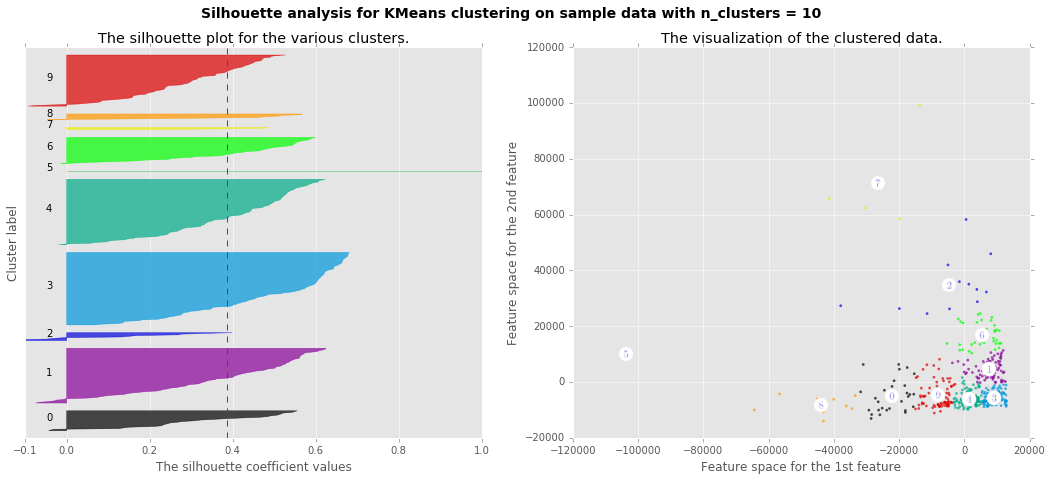

In [118]:
range_n_clusters = [2, 4, 6, 8, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_PCA) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_PCA)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_PCA, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_PCA, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_PCA[:, 0], X_PCA[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()